# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

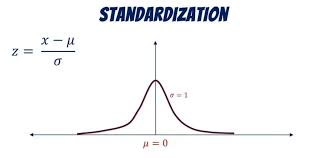


In [34]:
from pathlib import PureWindowsPath
# Step 1: Load and Standardize the data (use of numpy only allowed)

# importing important libraries

import numpy as np
import pandas as pd
#load dataset and read
df = pd.read_csv('/content/post_pandemic_remote_work_health_impact_2025.csv')
df.head()
#Selecting numeric datas only
numeric_df = df.select_dtypes(include=[np.number])
# converting to numpy
data = numeric_df.values
#standard using numpy
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

standardized_data =  (data-mean)/std # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation

standardized_data[:5]  # Display the first few rows of standardized data

array([[-1.32173993,  1.58437147,  0.00299566, -0.59290285],
       [-0.5317937 , -1.45060178,  0.86275015, -0.59290285],
       [-0.92676681, -1.5630082 ,  0.00299566, -0.59290285],
       [-0.29480983,  1.47196505, -1.71651333, -0.59290285],
       [-1.08475606,  1.69677788,  1.72250465,  1.08960887]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [35]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False) # Calculate covariance matrix
cov_matrix

array([[ 1.00031686,  0.00374933, -0.02252994, -0.00300591],
       [ 0.00374933,  1.00031686, -0.01488351, -0.00394206],
       [-0.02252994, -0.01488351,  1.00031686, -0.00464018],
       [-0.00300591, -0.00394206, -0.00464018,  1.00031686]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [36]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Perform eigendecomposition
eigenvalues, eigenvectors

(array([1.02913721, 0.97335877, 0.99626513, 1.00250632]),
 array([[ 0.59057186,  0.56943938,  0.56978522,  0.04804653],
        [ 0.43067667,  0.34587265, -0.7639166 , -0.33364823],
        [-0.68237034,  0.70745293,  0.01570547, -0.18339687],
        [-0.0106396 ,  0.23584159, -0.30253853,  0.92343705]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [37]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[ 0.59057186,  0.04804653,  0.56978522,  0.56943938],
       [ 0.43067667, -0.33364823, -0.7639166 ,  0.34587265],
       [-0.68237034, -0.18339687,  0.01570547,  0.70745293],
       [-0.0106396 ,  0.92343705, -0.30253853,  0.23584159]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [38]:
# Step 6: Project Data onto Principal Components
num_components = 2  # Decide on the number of principal components to keep
#select first num_component of eigenvector
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
# Project the standardized data onto the selected principal components
reduced_data = standardized_data @ selected_eigenvectors  # Project data onto the principal components
reduced_data[:5]

array([[-0.09396647, -1.1401856 ],
       [-1.52120961, -0.24729426],
       [-1.21620947, -0.07109087],
       [ 1.63744065, -0.7379884 ],
       [-1.09684283,  0.07203755]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [39]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3157, 2)


array([[-0.09396647, -1.1401856 ],
       [-1.52120961, -0.24729426],
       [-1.21620947, -0.07109087],
       [ 1.63744065, -0.7379884 ],
       [-1.09684283,  0.07203755]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

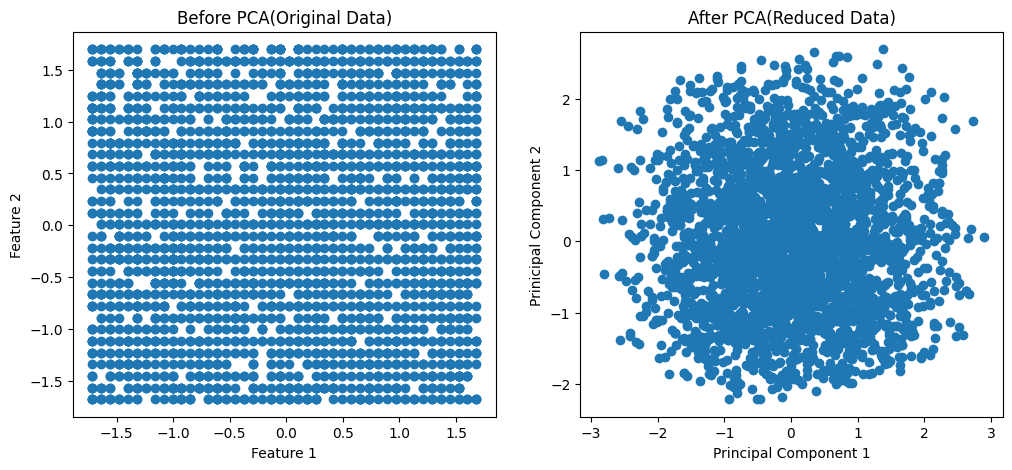

In [40]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))


# Plot original data (first two features for simplicity)
plt.subplot(1,2,1)
plt.scatter(standardized_data[:,0], standardized_data[:,1])
plt.title("Before PCA(Original Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data after PCA

plt.subplot(1,2,2)
plt.scatter(reduced_data[:,0], reduced_data[:,1])
plt.title("After PCA(Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Prinicipal Component 2")

plt.show()


In [41]:
## TASK 2: Dynamic selection of Principal Component using Explained variances

In [42]:
# calculating explained variance ratio
sorted_eigenvalues = eigenvalues[sorted_indices]

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

explained_variance_ratio


array([0.25720281, 0.25054719, 0.24898739, 0.24326261])

In [43]:
#calculating cummuative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

cumulative_explained_variance


array([0.25720281, 0.50775   , 0.75673739, 1.        ])

In [44]:
# Dynamically selecting number of components

threshold = 0.90
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
num_components

np.int64(4)

In [45]:
# Project data using dynamically selected components

selected_eigenvectors_dynamic = sorted_eigenvectors[:, :num_components]

reduced_data_dynamic = standardized_data @ selected_eigenvectors_dynamic

print("Dynamic number of components:", num_components)
print("Reduced data shape:", reduced_data_dynamic.shape)

reduced_data_dynamic[:5]


Dynamic number of components: 4
Reduced data shape: (3157, 4)


array([[-0.09396647, -1.1401856 , -1.78401254, -0.34237187],
       [-1.52120961, -0.24729426,  0.99805644, -0.33402378],
       [-1.21620947, -0.07109087,  0.84537288, -1.20605117],
       [ 1.63744065, -0.7379884 , -1.14001952, -1.01294741],
       [-1.09684283,  0.07203755, -2.21687069,  1.44473229]])

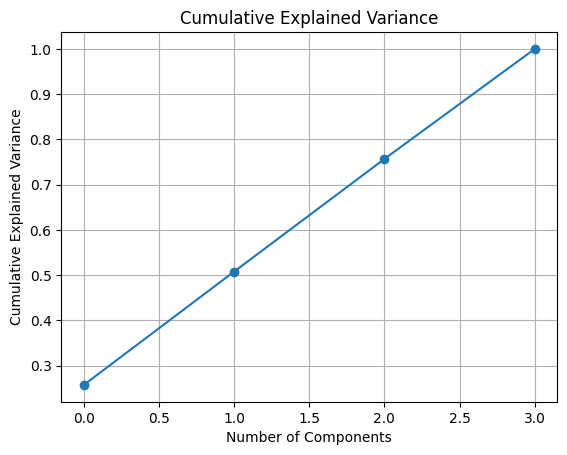

In [46]:
#plotting explained variance
import matplotlib.pyplot as plt

plt.figure()

plt.plot(cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.grid()

plt.show()

In [47]:
## TASK3: Optmizing PCA Implementation

In [48]:
# TASK 3: Optimized PCA Implementation

def optimized_pca(data, variance_threshold=0.90):
    """
    Optimized PCA implementation using NumPy only
    """

    #  Standardize data
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized = (data - mean) / std

    #  Covariance matrix
    cov_matrix = np.cov(standardized, rowvar=False)

    #  Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    #  Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    #  Explained variance ratio
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    #  Cumulative variance
    cumulative_variance = np.cumsum(explained_variance_ratio)

    #  Select number of components dynamically
    num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

    #  Select top components
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    #  Project data
    reduced_data = standardized @ selected_eigenvectors

    return reduced_data, selected_eigenvectors, explained_variance_ratio



In [49]:
reduced_data_opt, selected_vectors_opt, variance_ratio_opt = optimized_pca(data)

print("Optimized PCA reduced shape:", reduced_data_opt.shape)

reduced_data_opt[:5]


Optimized PCA reduced shape: (3157, 4)


array([[-0.09396647, -1.1401856 , -1.78401254, -0.34237187],
       [-1.52120961, -0.24729426,  0.99805644, -0.33402378],
       [-1.21620947, -0.07109087,  0.84537288, -1.20605117],
       [ 1.63744065, -0.7379884 , -1.14001952, -1.01294741],
       [-1.09684283,  0.07203755, -2.21687069,  1.44473229]])